# Pink Pink: Custom Chatbots with LLMs

## Problem Statement

 The goal of this project is to evaluate the effectiveness of multimodal AI by transforming visual content into text-based descriptions and assessing the model's understanding in question-answering contexts.

 Using different image processing models, we generate textual descriptions for image-based questions and combine these descriptions with the questions and answer options as input for LLMs.

 This work contributes to advancing the alignment of visual and linguistic processing within AI, supporting its application in areas where precise interpretation of visual information is crucial.



## Motivation

With the widespread application of artificial intelligence in education and professional fields, there is an increasing demand for AI systems capable of processing complex multimodal inputs. The ScienceQA dataset demonstrates the complexity of this challenge by presenting questions that require simultaneous interpretation of both textual and visual information. These issues span across multiple fields such as natural sciences, social sciences, and linguistics, requiring AI to possess deep interdisciplinary reasoning abilities.

The motivation of this project is to bridge the gap between AI in visual and language processing, and enhance the accuracy and contextual understanding of large language models (LLMs) in multimodal question answering tasks. By combining advanced visual language pre training (VLP) models with the Chain of Thought (CoT) inference framework, we aim to develop a system that not only provides accurate answers but also offers clear, logical explanations.

Through this work, we hope to push the boundaries of multimodal AI to better support fields such as education and research, especially in scenarios where it is necessary to understand both text and image information simultaneously, demonstrating stronger capabilities. This goal will lay the foundation for building more intelligent and reliable multimodal AI systems.


## Data Sources

ScienceQA is collected from elementary and high school science curricula, and contains 21,208 multimodal multiple-choice science questions. Out of the questions in ScienceQA, 10,332 (48.7%) have an image context, 10,220 (48.2%) have a text context, and 6,532 (30.8%) have both. Most questions are annotated with grounded lectures (83.9%) and detailed explanations (90.5%). The lecture and explanation provide general external knowledge and specific reasons, respectively, for arriving at the correct answer. To the best of our knowledge, ScienceQA is the first large-scale multimodal dataset that annotates lectures and explanations for the answers.
ScienceQA, in contrast to previous datasets, has richer domain diversity from three subjects: natural science, language science, and social science. Questions in each subject are categorized first by the topic (Biology, Physics, Chemistry, etc.), then by the category (Plants, Cells, Animals, etc.), and finally by the skill (Classify fruits and vegetables as plant parts, Identify countries of Africa, etc.). ScienceQA features 26 topics, 127 categories, and 379 skills that cover a wide range of domains. 


## Exploratory Analysis of Data

1. Dataset Properties
Total Questions: 21,208
Context Types:
Text context: 10,220 questions (48.2%)
Image context: 10,332 questions (48.7%)
Natural images: 2,960 (14.0%)
Diagram images: 7,372 (34.8%)
Both text and image context: 6,532 questions (30.8%)
No context: 7,188 questions (33.9%)
Lectures: 17,798 questions come with lecture-based content (83.9% of total).
Explanations: 19,202 questions come with detailed explanations (90.5% of total).

2. Classes and Labels
Topic classes: 26 (such as Biology, Physics, Chemistry, etc.)
Category classes: 127
Skill classes: 379 (fine-grained skills like identifying countries in Africa, classifying plant parts, etc.)
Different Questions: 9,122 unique questions.
Different Lectures: 261 unique lectures.

3. Preprocessing and Challenges
The dataset is complex due to its multi-modal nature, involving both text and image contexts, making it more challenging for models that need to combine visual and textual information.
Image Formats: Two different types of image formats (natural images and diagrams) further add to the dataset's complexity, requiring models to be able to differentiate between and interpret both visual forms.
Diverse Skill Requirements: With 379 different skills, the dataset demands a broad range of reasoning abilities, from simple fact recall to more complex logical deductions.
Contextual Variability: Some questions come with no context, some with only text or image, and others with both, which requires flexible modeling approaches that can handle varying input types.

4. Challenging Aspects
Multi-modal input: Handling questions that combine text, images, or both will require sophisticated models that can interpret and fuse these types of information.
Domain-Specific Knowledge: Covering natural science, language science, and social science, models will need to be versatile across these domains, often requiring deep contextual understanding.
Long Explanations and Lectures: Some questions are paired with long explanations or lecture content (average explanation length: 47.66 words, lecture length: 125.06 words), making this a challenging dataset for natural language understanding and generation tasks.

In summary, ScienceQA offers a rich, multi-modal, and diverse set of challenges that require complex reasoning, cross-domain knowledge, and the ability to process and fuse different forms of information (text and images).

In [49]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

In [50]:
json_file="problems.json"


In [51]:
with open(json_file,'r') as f:
    data=json.load(f)
topics=set()
for key,value in data.items():
    topics.add(value['topic'])
print(f"total topics:{len(topics)}")
print(topics)

total topics:26
{'vocabulary', 'figurative-language', 'pronouns', 'punctuation', 'geography', 'writing-strategies', 'verbs', 'culture', 'phonological-awareness', 'economics', 'global-studies', 'us-history', 'literacy-in-science', 'reading-comprehension', 'chemistry', 'science-and-engineering-practices', 'world-history', 'grammar', 'physics', 'word-study', 'units-and-measurement', 'earth-science', 'civics', 'reference-skills', 'biology', 'capitalization'}


Question: Which term matches the picture?
choices: ['chemical change', 'physical change']


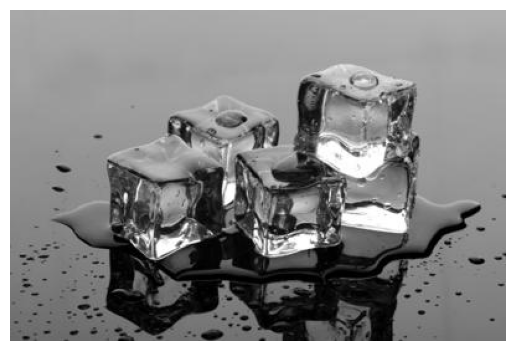

Question: Which of these states is farthest north?
choices: ['West Virginia', 'Louisiana', 'Arizona', 'Oklahoma']


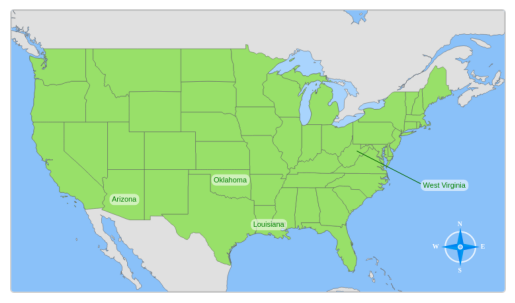

Question: Based on the bubble map, what does the quotation "Vanity, not love, has been my folly" show?
choices: ['Darcy is stubborn.', 'Elizabeth is judgmental.']


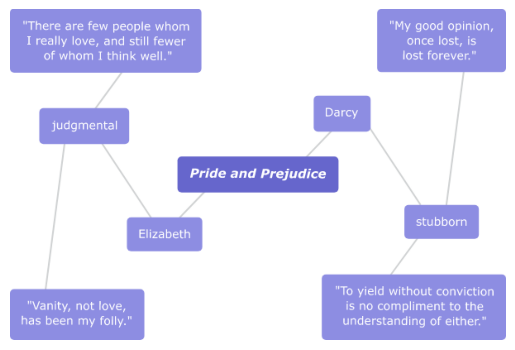

Question: What can Maureen and Kendrick trade to each get what they want?
choices: ["Kendrick can trade his broccoli for Maureen's oranges.", "Kendrick can trade his almonds for Maureen's tomatoes.", "Maureen can trade her tomatoes for Kendrick's broccoli.", "Maureen can trade her tomatoes for Kendrick's carrots."]


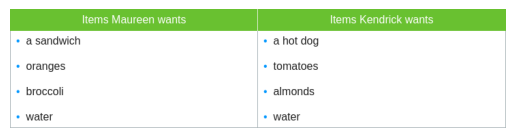

Question: An international organization is made up of members from () who ().
choices: ['different countries . . . declare war on other countries', 'different countries . . . work together for a shared purpose', 'the same country . . . work together for a shared purpose', 'the same country . . . declare war on other countries']


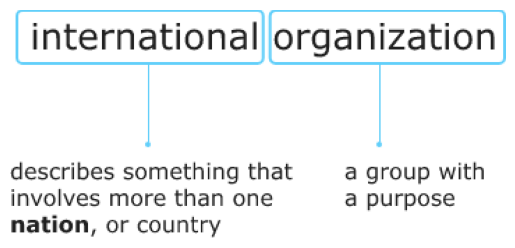

Question: What is the name of the colony shown?
choices: ['Maryland', 'New Hampshire', 'Rhode Island', 'Vermont']


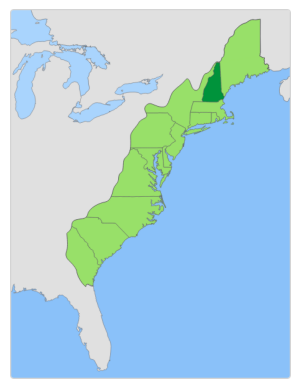

Question: Complete the sentence.
The African elephant is the () land animal in the world.
choices: ['smallest', 'largest']


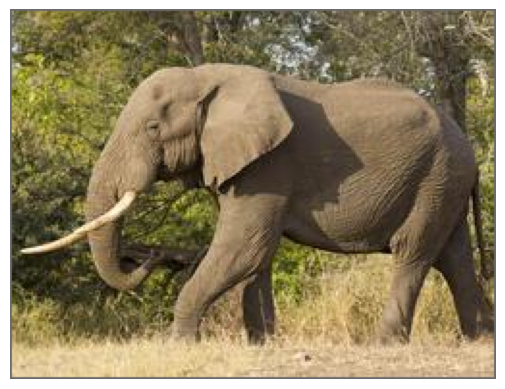

Question: What did the scientists discover?
choices: ['a sea turtle that can fly', 'a sea turtle with a glowing shell']


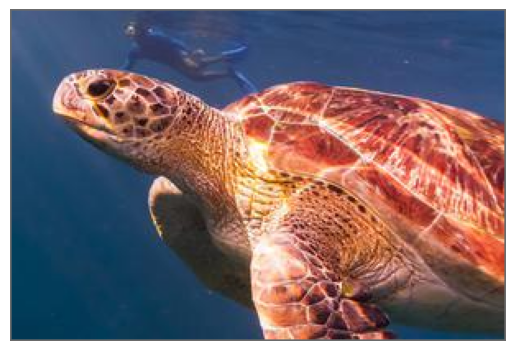

Question: Which solution has a higher concentration of blue particles?
choices: ['neither; their concentrations are the same', 'Solution B', 'Solution A']


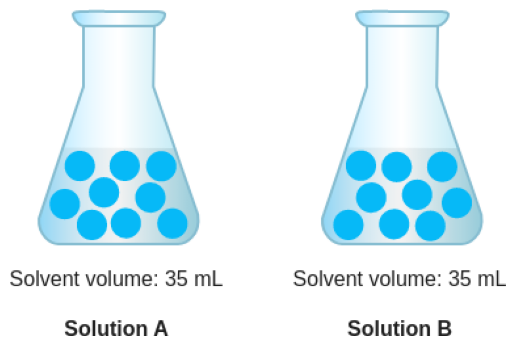

Question: Identify the question that Tom and Justin's experiment can best answer.
choices: ['Do ping pong balls stop rolling along the ground sooner after being launched from a 30° angle or a 45° angle?', 'Do ping pong balls travel farther when launched from a 30° angle compared to a 45° angle?']


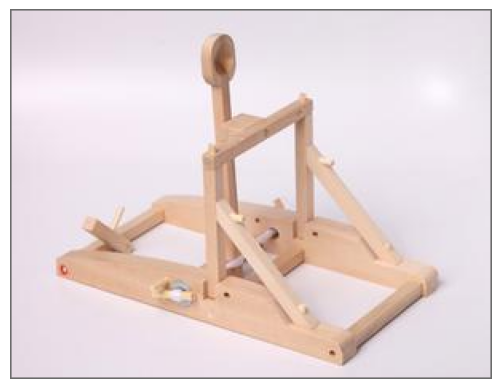

Question: Complete the sentence.
Christianity and () originated in the same region of the world.
choices: ['Buddhism', 'Judaism', 'Yoruba', 'Hinduism']


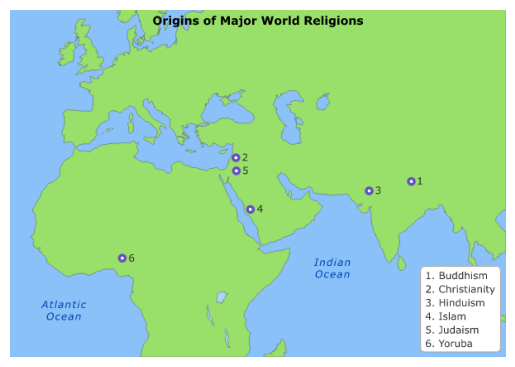

Question: Compare the average kinetic energies of the particles in each sample. Which sample has the higher temperature?
choices: ['neither; the samples have the same temperature', 'sample A', 'sample B']


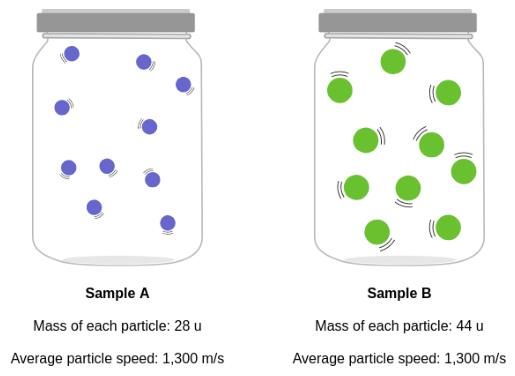

Question: Which term matches the picture?
choices: ['appendicular skeleton', 'axial skeleton']


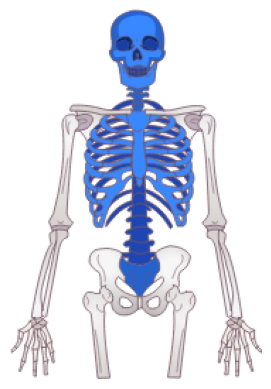

Question: Does this passage describe the weather or the climate?
choices: ['weather', 'climate']


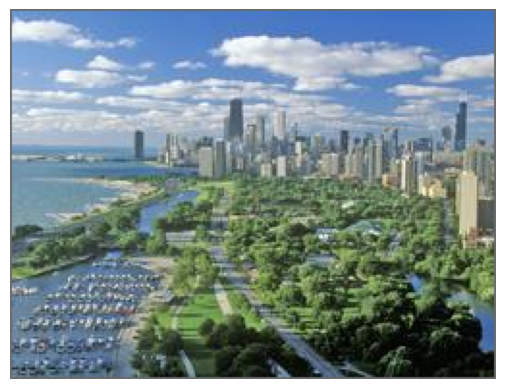

Question: The United States has a federal system. Based on these definitions, which of these statements would most likely be made by a person who lives under a federal system?
choices: ['My national government officials decide most issues that come up.', 'Both my state and national government officials have power over important issues.', 'I only pay attention to state politics since the national government has almost no power.']


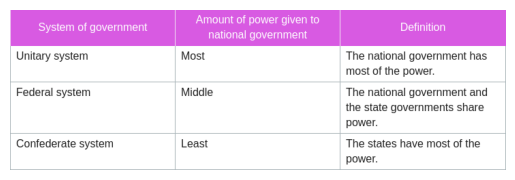

Question: Which animal's mouth is also adapted for bottom feeding?
choices: ['discus', 'armored catfish']


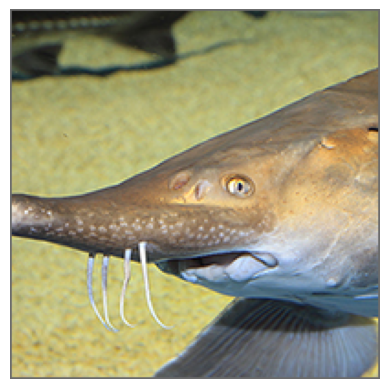

In [52]:

for topic_display in topics:
    for key,value in data.items():
        if value['topic']==topic_display:
            if not value.get('image'):
                continue
            split=value['split']
            image_show=f"{split}/{split}"
            
            image_path=os.path.join(image_show,key)
            image_path=os.path.join(image_path,value['image'])
            question=value['question']
            choices=value['choices']
            print(f"Question: {question}")
            print(f"choices: {choices}")
            image=Image.open(image_path)
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            
            break


## Methods

We used VLP + CoT + LLM to solve multimodal problems.

VLP generates image descriptions, CoT combines the descriptions and questions to create prompts, and LLM provides the final response.

LLM : Large Language Model

VLP: Vision-Language Pretraining

CoT: Chain of thought


### 1. vitgpt2 + gpt4o-mini

We chose ViTGPT2 as the VLP and GPT4O-mini as the LLM. This is the method used in the paper.

ViTGPT2 is a multimodal model that combines visual features with language generation capabilities, making it particularly suitable for tasks requiring textual descriptions or generation based on images. Its core innovation lies in leveraging ViT to extract visual information and GPT-2 to generate natural language, thus bridging the gap between vision and language.

image description: image_descriptions\vitgpt2_descriptions.json

output: outputs\vitgpt2_gpt_output.json

code: vitgpt2+gpt.ipynb



### 2. BLIP + gpt4o-mini

We chose BLIP as the VLP and GPT4O-mini as the LLM. This is our innovative approach.

BLIP (Bootstrapped Language-Image Pretraining) is a cutting-edge multimodal framework focused on joint pretraining of vision and language. Through its innovative pretraining strategy, it significantly enhances the performance of cross-modal tasks, such as image captioning, visual question answering, and image-text retrieval.

The core innovation of BLIP lies in combining self-supervised and supervised learning to progressively guide the model in learning more accurate vision-language correspondences. By employing a bootstrapped learning strategy, it enhances the model's ability to generate high-quality image descriptions and understand multimodal inputs.

image description: image_descriptions\BLIP_descriptions.json

output: outputs\blip_gpt_output.json

code: blip+gpt.ipynb



### 3. gpt4o-mini

Both our VLP and LLM are based on GPT4O-mini. This is our innovative approach.

GPT4O-mini is a versatile model capable of handling images in vision-language pretraining (VLP) tasks and excelling as a large language model (LLM) for text generation and comprehension. By integrating vision and language capabilities, it demonstrates outstanding performance in both multimodal and language tasks.


image description: image_descriptions\gpt4omini_descriptions.json

output: outputs\gpt4omini_output.json

code: gpt4omini.ipynb

## Results

### image description

vitgpt2: "5": "A large white kite is in the air.",

BLIP: "5": "a large white light",

gpt4o-mini: "5": "The image depicts a large, dome-shaped structure suspended in an expansive, industrial-like space. This structure resembles a parachute or aerodynamic capsule, characterized by its smooth, rounded top and a series of ripple-like folds along its surface. The exterior is primarily white, with an orange band encircling its middle, which adds a striking visual contrast. \n\nThe setting around the structure is a vast, dimly lit hangar or testing facility. The walls are lined with large, vertical panels, and the ceiling features a grid of lights that illuminate the space. The capsule is supported by a framework that likely includes cables or stands, indicating that it is being held in place for testing or demonstration purposes.\n\nOverall, the image conveys a sense of advanced technology and engineering, possibly related to aerospace or space exploration. The clean, minimalist design combined with the industrial surroundings emphasizes the innovative nature of the project being showcased.",


### question response

vitgpt2+gpt: "The answer is B for answer index 1, because: The text addresses the goddess directly, which is an example of apostrophe."

blip+gpt: "The answer is B for answer index 1, because: Gordon's test could show how steady a parachute with a 1 m vent was at 200 km per hour, which is what he was specifically observing in the wind tunnel.",

gpt4o-mini: "The answer is B for answer index 1, because: The phrase 'Sing, O goddess' is an example of apostrophe, as it directly addresses a personification (the goddess) that is not physically present.",

### Accuracy rate

In [ ]:
import json
import warnings
import pandas as pd

warnings.filterwarnings('ignore')


def get_acc_with_contion(res_pd, key, values):
    if isinstance(values, list):
        total_pd = res_pd[res_pd[key].isin(values)]
    else:
        total_pd = res_pd[res_pd[key] == values]
    correct_pd = total_pd[total_pd['true_false'] == True]
    if len(total_pd) == 0:
        return -1
    acc = "{:.2f}".format(len(correct_pd) / len(total_pd) * 100)
    # print(f"{key} {values} {len(total_pd)}")
    return acc


def get_scores(result_file, data_file):
    # read result file
    results = json.load(open(result_file))["results"]
    num = len(results)
    assert num == 4241
    #print("number of questions:", num)

    # read data file
    sqa_data = json.load(open(data_file))

    # construct pandas data
    sqa_pd = pd.DataFrame(sqa_data).T
    res_pd = sqa_pd[sqa_pd['split'] == 'test']  # test set

    # update data
    for index, row in res_pd.iterrows():

        res_pd.loc[index, 'no_context'] = True if (not row['hint'] and not row['image']) else False
        res_pd.loc[index, 'has_text'] = True if row['hint'] else False
        res_pd.loc[index, 'has_image'] = True if row['image'] else False
        res_pd.loc[index, 'has_text_image'] = True if (row['hint'] and row['image']) else False

        label = row['answer']
        pred = int(results[index])
        res_pd.loc[index, 'pred'] = pred
        res_pd.loc[index, 'true_false'] = (label == pred)

    # accuracy scores
    acc_average = len(res_pd[res_pd['true_false'] == True]) / num * 100
    #assert result_file.split('_')[-1] == "{:.3f}.json".format(acc_average)

    scores = {
        'acc_natural':
        get_acc_with_contion(res_pd, 'subject', 'natural science'),
        'acc_social':
        get_acc_with_contion(res_pd, 'subject', 'social science'),
        'acc_language':
        get_acc_with_contion(res_pd, 'subject', 'language science'),
        'acc_has_text':
        get_acc_with_contion(res_pd, 'has_text', True),
        'acc_has_image':
        get_acc_with_contion(res_pd, 'has_image', True),
        'acc_no_context':
        get_acc_with_contion(res_pd, 'no_context', True),
        'acc_grade_1_6':
        get_acc_with_contion(res_pd, 'grade', ['grade1', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6']),
        'acc_grade_7_12':
        get_acc_with_contion(res_pd, 'grade', ['grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12']),
        'acc_average':
        "{:.2f}".format(acc_average),
    }

    return scores

In [2]:
def print_scores(scores1, scores2, scores3):
    # Define header with model names and adjusted formatting
    header = f"{'Score Type':<20} {'vitgpt2_gpt':<15} {'blip_gpt':<15} {'gpt4omini':<15}"
    print(header)
    print("-" * len(header))

    # Get all unique score types (keys) from the three dictionaries
    all_keys = set(scores1.keys()).union(scores2.keys()).union(scores3.keys())

    # Output each score type in a new row with values from each model
    for key in sorted(all_keys):
        score1 = scores1.get(key, "N/A")
        score2 = scores2.get(key, "N/A")
        score3 = scores3.get(key, "N/A")
        print(f"{key:<20} {score1:<15} {score2:<15} {score3:<15}")


data_file = "problems.json"
result_file1 = "outputs/vitgpt2_gpt_output.json"
result_file2 = "outputs/blip_gpt_output.json"
result_file3 = "outputs/gpt4omini_output.json"

scores1 = get_scores(result_file1, data_file)
scores2 = get_scores(result_file2, data_file)
scores3 = get_scores(result_file3, data_file)

print_scores(scores1, scores2, scores3)


Score Type           vitgpt2_gpt     blip_gpt        gpt4omini      
--------------------------------------------------------------------
acc_average          79.86           81.44           82.88          
acc_grade_1_6        82.05           84.58           86.67          
acc_grade_7_12       75.94           75.81           76.07          
acc_has_image        70.20           72.88           76.95          
acc_has_text         76.74           79.33           78.79          
acc_language         85.73           86.55           86.36          
acc_natural          79.35           81.44           82.46          
acc_no_context       88.78           89.27           88.78          
acc_social           73.90           75.14           79.64          


### Similarity

BLEU (Bilingual Evaluation Understudy) is a metric for evaluating text generation tasks, such as machine translation and text generation, by measuring the similarity between the generated text and the reference text.

BLEU-1 focuses on the matching of individual words (unigram precision).


BLEU-4 is a variant of the BLEU metric that focuses on 4-gram matches (multi-word combinations). It is used to measure the accuracy of generated text in terms of sentence structure and context.

ROUGE-L focuses on measuring the longest common subsequence (LCS) between the generated text and the reference text.


Similarity is a measure of the overall resemblance between the generated text and the reference text, often calculated using Cosine Similarity.

Code for the function to calculate relevant performance metrics:

tool\evaluate_explaination.py



In [5]:
# Create the data for the table
data = [
    ["VLP", "LLM", "BLEU-1", "BLEU-4", "ROUGE-L", "Similarity"],
    ["VIT-GPT2", "GPT", 0.062, 0.026, 0.233, 0.485],
    ["BLIP", "GPT", 0.064, 0.028, 0.234, 0.480],
    ["GPT", "GPT", 0.066, 0.026, 0.232, 0.479],
]

# Function to display the table
def display_table(data):
    col_widths = [max(len(str(row[i])) for row in data) for i in range(len(data[0]))]
    for row in data:
        print(" | ".join(str(row[i]).ljust(col_widths[i]) for i in range(len(row))))

# Display the table
display_table(data)


VLP      | LLM | BLEU-1 | BLEU-4 | ROUGE-L | Similarity
VIT-GPT2 | GPT | 0.062  | 0.026  | 0.233   | 0.485     
BLIP     | GPT | 0.064  | 0.028  | 0.234   | 0.48      
GPT      | GPT | 0.066  | 0.026  | 0.232   | 0.479     


## discussion

In summary, our project assessed LLM capabilities in multimodal tasks by combining different VLP models with Cot reasoning. Results showed that, this approach improved accuracy and clarity in handling both visual and textual inputs, marking an advancement in multimodal question-answering performance.

### Advantages

Regarding strengths, two key features stand out. First, we achieved high accuracy by using an enhanced VLP model, which improves the accuracy of the generated answers. Second, Chain of Thought reasoning enabled us to generate clear, well-structured responses, guiding the model to produce logical and easy-to-follow answers step-by-step.

### Drawbacks

The first is low similarity, which is mainly due to the lack of fine-tuning in our model; this limits our ability to fully tailor responses to specific tasks. The second drawback is a lack of diversity in responses. As we currently rely on only one type of large language model, there is not much change between answers.

### Future Work

1. We could incorporate few-shot learning（Combine few similar examples into prompt, enabling our model to better understand and adapt to new tasks).

2. Model fine-tuning will def get better model’s responses, but it isdifficult for us to achieve this right now

3. Multimodal LLM can integrate text and image inputs. This will adapt the answer to a wider range of scenarios